In [2]:
import numpy as np
import pandas as pd

import scipy as sp
import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')

In [4]:
data = pd.read_excel('D:/따릉이/timeseries.xlsx')

In [5]:
data.head()

,datetime,year,month,day,hour,count,holiday,dayofweek,season,weekday
0,2018-01-01,2018,1,1,0,206,1,0,winter,1
1,2018-01-01,2018,1,1,1,230,1,0,winter,1
2,2018-01-01,2018,1,1,2,178,1,0,winter,1
3,2018-01-01,2018,1,1,3,119,1,0,winter,1
4,2018-01-01,2018,1,1,4,62,1,0,winter,1


In [6]:
feature_names = ['year','month','day','hour','holiday','dayofweek','season','weekday']


In [12]:
X = pd.DataFrame(data, columns=feature_names)
X.head()

,year,month,day,hour,holiday,dayofweek,season,weekday
0,2018,1,1,0,1,0,winter,1
1,2018,1,1,1,1,0,winter,1
2,2018,1,1,2,1,0,winter,1
3,2018,1,1,3,1,0,winter,1
4,2018,1,1,4,1,0,winter,1


In [18]:
X.drop(columns=['season'], inplace=True)
list = []
for i in X['month']:
    if i in [12,1,2]:
        list.append(4)
    elif i in [3,4,5]:
        list.append(1)
    elif i in [6,7,8]:
        list.append(2)
    else:
        list.append(3)

X['season'] = list
X.head()

,year,month,day,hour,holiday,dayofweek,weekday,season
0,2018,1,1,0,1,0,1,4
1,2018,1,1,1,1,0,1,4
2,2018,1,1,2,1,0,1,4
3,2018,1,1,3,1,0,1,4
4,2018,1,1,4,1,0,1,4


In [8]:
y = pd.DataFrame(data, columns=['count'])
y.head()

,count
0,206
1,230
2,178
3,119
4,62


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [20]:
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train, axis=1)
model_trained = model.fit()

C:\Users\sby04\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


C:\Users\sby04\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\sby04\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


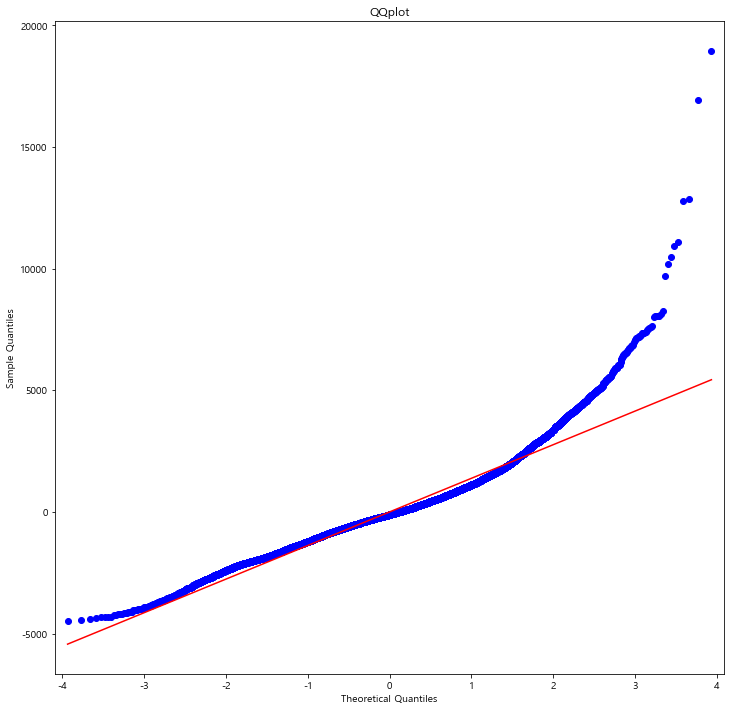

In [22]:
# 확률오차의 정규성 확인

model_residuals = model_trained.resid

plt.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots(1,1)
fig.set_figheight(12)
fig.set_figwidth(12)

sm.ProbPlot(model_residuals).qqplot(line='s', color='b', ax=ax)
ax.title.set_text('QQplot')

C:\Users\sby04\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Fitted values'), Text(0, 0.5, 'Residuals')]

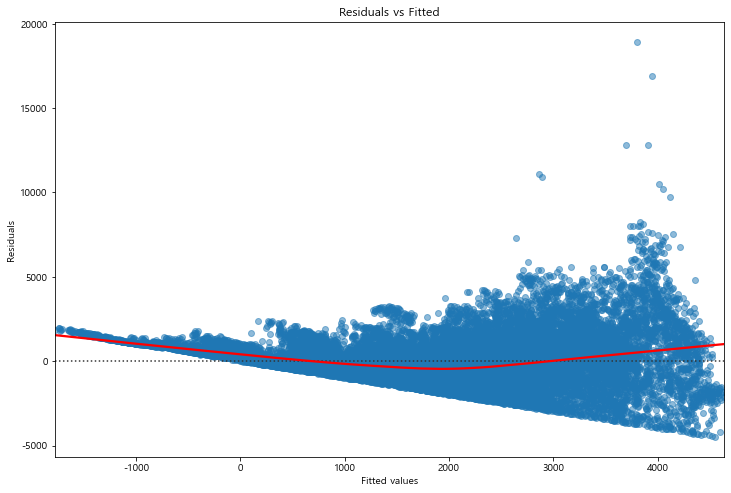

In [26]:
# 확률오차의 등분산성 확인

model_fitted_y = model_trained.fittedvalues

fig, ax = plt.subplots(1,1)
fig.set_figheight(8)
fig.set_figwidth(12)

sns.residplot(model_fitted_y, y_train, data=X_train, lowess=True, scatter_kws={'alpha':0.5},
             line_kws={'color':'red'}, ax=ax)
ax.title.set_text('Residuals vs Fitted')
ax.set(xlabel='Fitted values', ylabel='Residuals')

In [27]:
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     2233.
Date:                Tue, 01 Mar 2022   Prob (F-statistic):               0.00
Time:                        19:38:59   Log-Likelihood:            -2.0771e+05
No. Observations:               24014   AIC:                         4.154e+05
Df Residuals:                   24005   BIC:                         4.155e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.415e+06   1.62e+04    -87.466      0.0

In [29]:
model = sm.OLS(y_train, X_train.drop(['day'], axis=1))
model_trained = model.fit()
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     2552.
Date:                Tue, 01 Mar 2022   Prob (F-statistic):               0.00
Time:                        19:42:21   Log-Likelihood:            -2.0771e+05
No. Observations:               24014   AIC:                         4.154e+05
Df Residuals:                   24006   BIC:                         4.155e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.415e+06   1.62e+04    -87.455      0.0

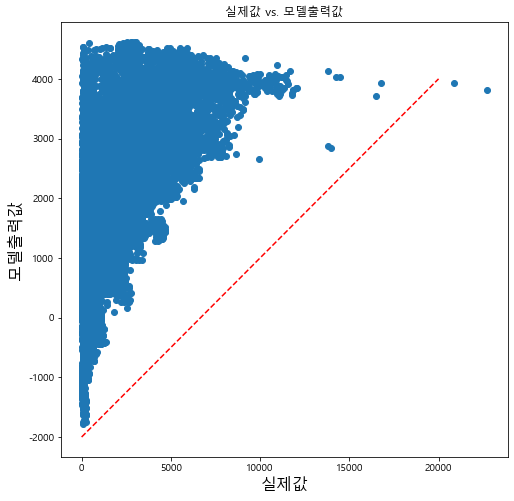

In [38]:
#예측하기

y_train_pred = model_trained.fittedvalues

plt.figure(figsize=(8,8))
plt.title('실제값 vs. 모델출력값')
plt.scatter(y_train, y_train_pred)
plt.plot([0,20000],[-2000,4000],ls='--',c='red')
plt.xlabel('실제값', size=16)
plt.ylabel('모델출력값', size=16)
plt.show()

In [39]:
X_test = sm.add_constant(X_test)

C:\Users\sby04\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [41]:
y_test_pred = model_trained.predict(X_test.drop(['day'], axis=1))
y_test_pred.head()

16412     279.142029
28011    3793.255855
25444    1267.536562
10255    1746.656296
27447    2703.553400
dtype: float64

In [42]:
#평균제곱오차
print(mean_squared_error(y_test, y_test_pred))

1911422.4093628498


In [43]:
#제곱근 평균제곱오차
print(np.sqrt(mean_squared_error(y_test,y_test_pred)))

1382.5420099811975


In [44]:
#평균 절대 오차
print(mean_absolute_error(y_test,y_test_pred))

1008.7360451016865


In [46]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred/y_true))*100)

print(mean_absolute_percentage_error(y_test, y_test_pred))

191318.81751663398


In [47]:
#결정계수

In [48]:
print(r2_score(y_test, y_test_pred))

0.4259042202850766


In [49]:
#결과정리
print('Training MSE:{:.3f}'.format(mean_squared_error(y_train, y_train_pred)))
print('Training RMSE:{:.3f}'.format(np.sqrt(mean_squared_error(y_train, y_train_pred))))
print('Training MAE:{:.3f}'.format(mean_absolute_error(y_train, y_train_pred)))
print('Training MAPE:{:.3f}'.format(mean_absolute_percentage_error(y_train, y_train_pred)))
print('Training R2:{:.3f}'.format(r2_score(y_train, y_train_pred)))

Training MSE:1907101.745
Training RMSE:1380.979
Training MAE:994.230
Training MAPE:185746.355
Training R2:0.427


In [50]:
print('Testing MSE:{:.3f}'.format(mean_squared_error(y_test, y_test_pred)))
print('Testing RMSE:{:.3f}'.format(np.sqrt(mean_squared_error(y_test, y_test_pred))))
print('Testing MAE:{:.3f}'.format(mean_absolute_error(y_test, y_test_pred)))
print('Testing MAPE:{:.3f}'.format(mean_absolute_percentage_error(y_test, y_test_pred)))
print('Testing R2:{:.3f}'.format(r2_score(y_test, y_test_pred)))

Testing MSE:1911422.409
Testing RMSE:1382.542
Testing MAE:1008.736
Testing MAPE:191318.818
Testing R2:0.426


In [52]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [53]:
lr_skl = LinearRegression(fit_intercept=False)
lr_skl.fit(X_train, y_train)
y_pred_skl = lr_skl.predict(X_test)

lr_stat = sm.OLS(y_train, X_train).fit()
y_pred_stat = lr_stat.predict(X_test)

In [54]:
test_mse_stat = mean_squared_error(y_test, y_pred_stat)
test_rmse_stat = np.sqrt(mean_squared_error(y_test, y_pred_stat))
test_mae_stat = mean_absolute_error(y_test, y_pred_stat)
test_mape_stat = mean_absolute_percentage_error(y_test, y_pred_stat)
test_r2_stat = r2_score(y_test, y_pred_stat)

print('Testing MSE:{:.3f}'.format(test_mse_stat))
print('Testing RMSE:{:.3f}'.format(test_rmse_stat))
print('Testing MAE:{:.3f}'.format(test_mae_stat))
print('Testing MAPE:{:.3f}'.format(test_mape_stat))
print('Testing R2:{:.3f}'.format(test_r2_stat))

Testing MSE:1910939.758
Testing RMSE:1382.367
Testing MAE:1008.499
Testing MAPE:191318.813
Testing R2:0.426


In [55]:
test_mse_skl = mean_squared_error(y_test, y_pred_skl)
test_rmse_skl = np.sqrt(mean_squared_error(y_test, y_pred_skl))
test_mae_skl = mean_absolute_error(y_test, y_pred_skl)
test_mape_skl = mean_absolute_percentage_error(y_test, y_pred_skl)
test_r2_skl = r2_score(y_test, y_pred_skl)

print('Testing MSE:{:.3f}'.format(test_mse_skl))
print('Testing RMSE:{:.3f}'.format(test_rmse_skl))
print('Testing MAE:{:.3f}'.format(test_mae_skl))
print('Testing MAPE:{:.3f}'.format(test_mape_skl))
print('Testing R2:{:.3f}'.format(test_r2_skl))

Testing MSE:1910939.758
Testing RMSE:1382.367
Testing MAE:1008.499
Testing MAPE:191398.447
Testing R2:0.426


In [56]:
X.corr()

,year,month,day,hour,holiday,dayofweek,weekday,season
year,1.000000,0.024403,-0.017696,-0.000962,0.005204,0.000927,0.003220,0.017039
month,0.024403,1.000000,0.025061,0.000822,-0.026185,-0.000395,-0.001261,0.196307
day,-0.017696,0.025061,1.000000,0.000117,-0.084021,0.000067,0.000214,-0.002332
hour,-0.000962,0.000822,0.000117,1.000000,0.000032,0.000416,-0.000807,0.000483
holiday,0.005204,-0.026185,-0.084021,0.000032,1.000000,0.023268,-0.009248,0.054824
dayofweek,0.000927,-0.000395,0.000067,0.000416,0.023268,1.000000,-0.789489,-0.006533
weekday,0.003220,-0.001261,0.000214,-0.000807,-0.009248,-0.789489,1.000000,0.004693
season,0.017039,0.196307,-0.002332,0.000483,0.054824,-0.006533,0.004693,1.000000
